In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('Titanic-Dataset.csv')

In [14]:
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
print("Number of passengers:", df.shape[0], "Number of features:", df.shape[1])

Number of passengers: 891 Number of features: 12


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
print(type(df.columns))

print(df.columns.tolist())

<class 'pandas.core.indexes.base.Index'>
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [18]:
#survivors count
df['Survived'].value_counts()


Survived
0    549
1    342
Name: count, dtype: int64

In [19]:
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])

Age         177
Cabin       687
Embarked      2
dtype: int64


In [20]:
missing_percent = (missing_data / len(df)) * 100
missing_percent = missing_percent[missing_percent > 0]
for col, percent in missing_percent.items():
    print(f"{col}: {percent:.2f} % missing values")

Age: 19.87 % missing values
Cabin: 77.10 % missing values
Embarked: 0.22 % missing values


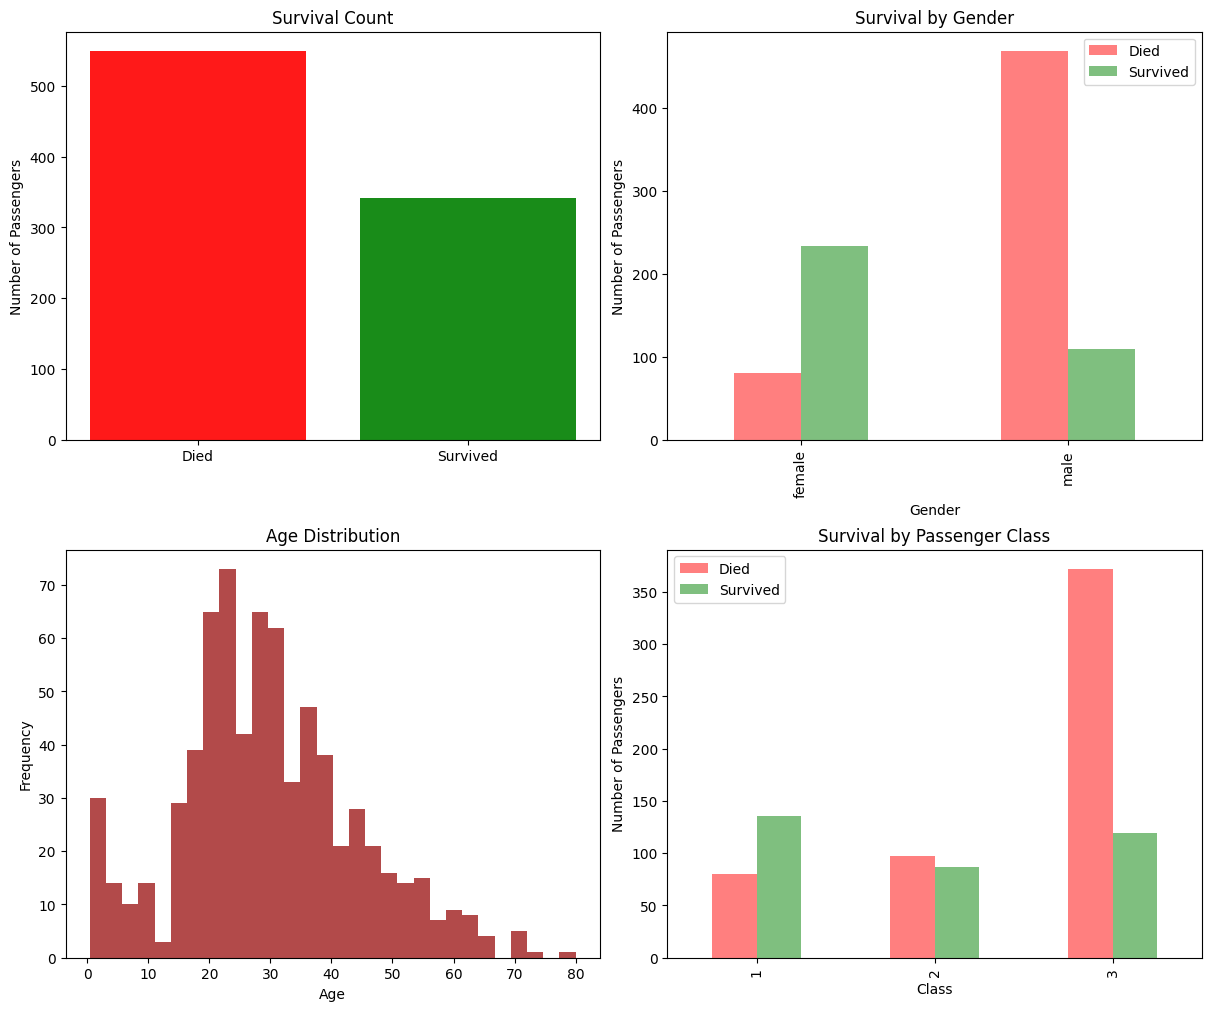

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10), constrained_layout=True)

# survival count
survival_counts = df['Survived'].value_counts()
axes[0,0].bar(['Died', 'Survived'], survival_counts, color=['red', 'green'], alpha=0.9)
axes[0,0].set_title('Survival Count')
axes[0,0].set_ylabel('Number of Passengers')


# survival by gender
survival_by_gender = pd.crosstab(df['Sex'], df['Survived'])
survival_by_gender.plot(kind='bar', ax=axes[0,1], color=['red', 'green'], alpha=0.5, 
                        title='Survival by Gender', ylabel='Number of Passengers', xlabel='Gender')
axes[0,1].legend(['Died', 'Survived'])


#age distribution
df['Age'].dropna().plot(kind='hist', bins=30, ax=axes[1,0],alpha=0.85,
                        title="Age Distribution", xlabel='Age', ylabel='Frequency', color='brown')


# survival by class
survival_by_class = pd.crosstab(df['Pclass'], df['Survived'])
survival_by_class.plot(kind='bar', ax=axes[1,1], color=['red', 'green'], alpha=0.5, 
                       title='Survival by Passenger Class', ylabel='Number of Passengers', xlabel='Class')
axes[1,1].legend(['Died', 'Survived'])

plt.show()

Overall survival rate: 38.38%
Female survival rate: 74.20%
Male survival rate: 18.89%


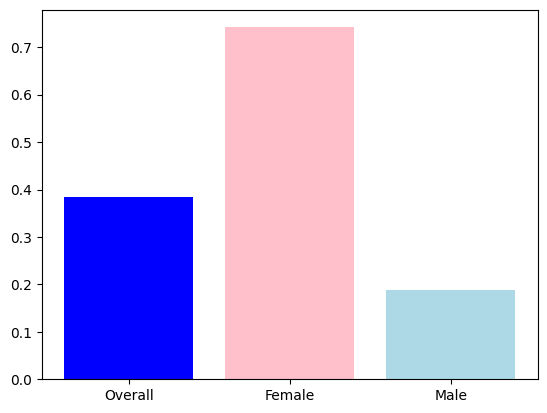

In [22]:
print(f"Overall survival rate: {df['Survived'].mean():.2%}")
print(f"Female survival rate: {df[df['Sex']=='female']['Survived'].mean():.2%}")
print(f"Male survival rate: {df[df['Sex']=='male']['Survived'].mean():.2%}")

plt.bar(['Overall', 'Female', 'Male'], [df['Survived'].mean(), df[df['Sex']=='female']['Survived'].mean(), df[df['Sex']=='male']['Survived'].mean()], color=['blue', 'pink', 'lightblue'])

plt.draw()

In [23]:
#NOTE to self: manipulate df_processed instead of df
df_processed =df.copy()

In [24]:
# missing values from these columns: Age, Cabin, Embarked
median_age = df_processed['Age'].median()
df_processed['Age'].fillna(median_age, inplace=True)

C:\Users\bisma\AppData\Local\Temp\ipykernel_17960\2776790289.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_processed['Age'].fillna(median_age, inplace=True)


In [25]:
df_processed['Age'] = df_processed['Age'].fillna(median_age)

# print(df_processed['Age'].isnull().sum())  # Should print 0


most_frequent_embarked = df_processed['Embarked'].mode()[0]
df_processed['Embarked'] = df_processed['Embarked'].fillna(most_frequent_embarked)

# median_fare = df_processed['Fare'].median()
# df_processed['Fare'] = df_processed['Fare'].fillna(median_fare)
df_processed['Fare'].isnull().sum()

df_processed.drop(columns=['Cabin'], axis=1, inplace=True)

In [26]:
print(df_processed.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [27]:
df_processed.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [30]:
#TODO: encode categorical variables to numerical
from sklearn.preprocessing import LabelEncoder

le_sex = le_embarked = LabelEncoder()
df_processed['Sex'] = le_sex.fit_transform(df_processed['Sex'])
# male=1, female=0
df_processed['Embarked'] = le_embarked.fit_transform(df_processed['Embarked'])
# C=0, Q=1, S=2

In [31]:
df_processed.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


In [32]:
feature_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target_column = 'Survived'

X = df_processed[feature_columns]
y = df_processed[target_column]

In [34]:
print(X.columns.tolist())
print(f"Shape of feature matrix: {X.shape}")
print(f"\nTarget (y): {target_column}, Target vector shape {y.shape}")

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
Shape of feature matrix: (891, 7)

Target (y): Survived, Target vector shape (891,)


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data: {X_train.shape[0]} passengers")
print(f"Testing data: {X_test.shape[0]} passengers")
print(f"Training survival rate: {y_train.mean():.2%}")
print(f"Testing survival rate: {y_test.mean():.2%}")

Training data: 712 passengers
Testing data: 179 passengers
Training survival rate: 37.64%
Testing survival rate: 41.34%


In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [39]:
lr_predictions = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_predictions)

print(f"Logistic Regression Accuracy: {lr_accuracy:.2%}")
print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_predictions, target_names=['Died', 'Survived']))


Logistic Regression Accuracy: 81.01%
Logistic Regression Classification Report:
              precision    recall  f1-score   support

        Died       0.83      0.86      0.84       105
    Survived       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

